In [1]:
!pip install pandas matplotlib seaborn scikit-learn joblib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats.mstats import winsorize
import joblib
import logging
%matplotlib inline

In [4]:
logging.basicConfig(level=logging.INFO)


In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
logging.info("Data Description:")
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
logging.info("\nData Information:")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
mask = df['Spending Score (1-100)'] >50
df_score = df[mask]
df_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [10]:
df_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


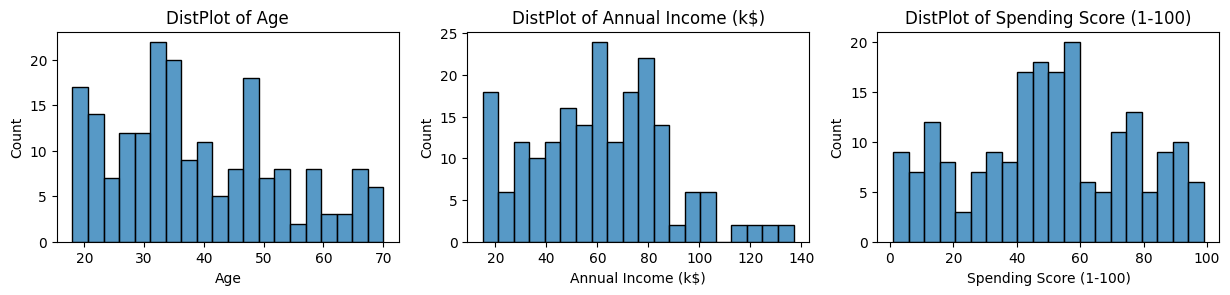

In [11]:
plt.figure(figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    sns.histplot(df[x], bins=20)
    plt.title('DistPlot of {}'.format(x))
plt.show()


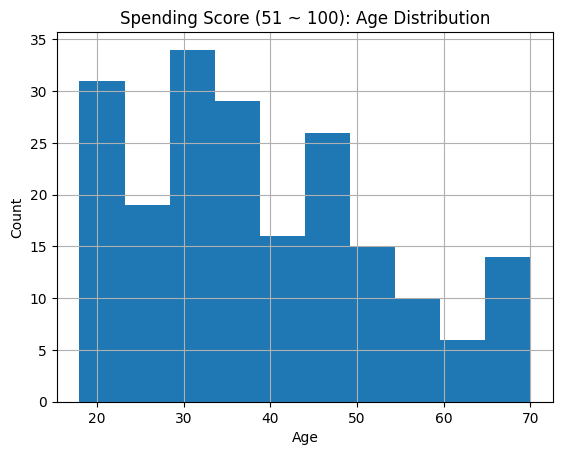

In [12]:
df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score (51 ~ 100): Age Distribution')
plt.show()


***Above histogram shows Age Distribution of people having spending score grater than 50***

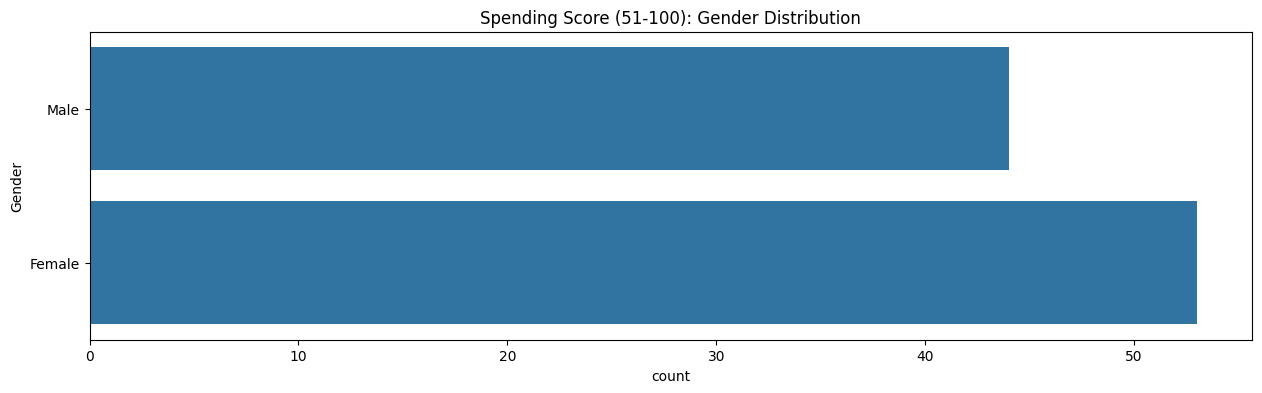

In [13]:
plt.figure(figsize=(15, 4))
sns.countplot(y='Gender', data=df[df['Spending Score (1-100)'] > 50])
plt.title('Spending Score (51-100): Gender Distribution')
plt.show()


***Gender Distribution (Spending Score > 50)***

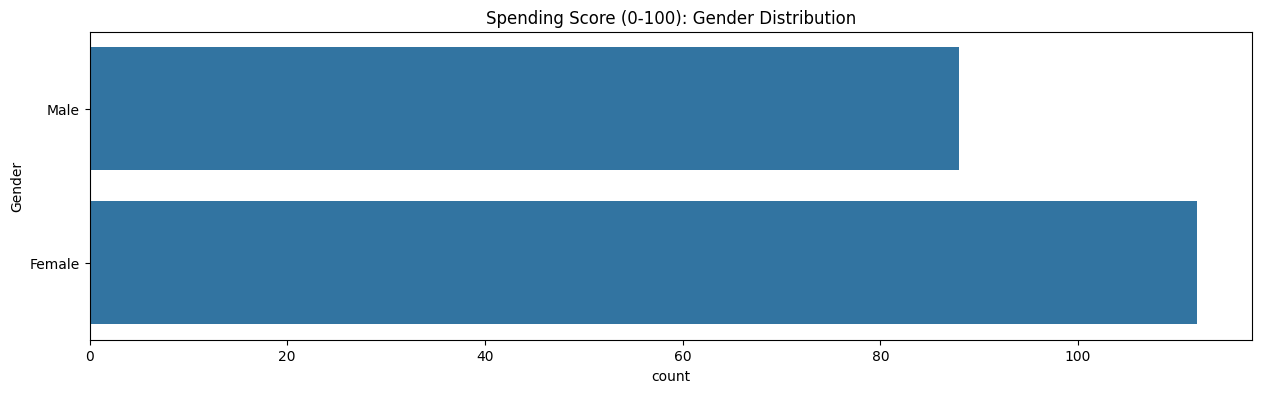

In [14]:
plt.figure(figsize=(15, 4))
sns.countplot(y='Gender', data=df)
plt.title('Spending Score (0-100): Gender Distribution')
plt.show()


***Gender Distribution (All Spending Scores)***

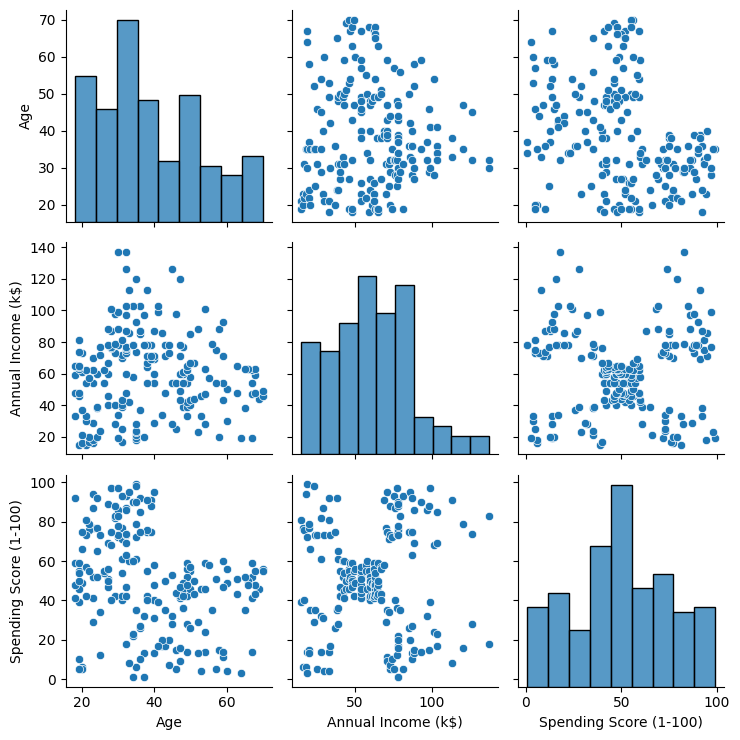

In [15]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], kind='scatter')
plt.tight_layout()
plt.show()


***Pairplot for Age, Annual Income  and Spending Score***

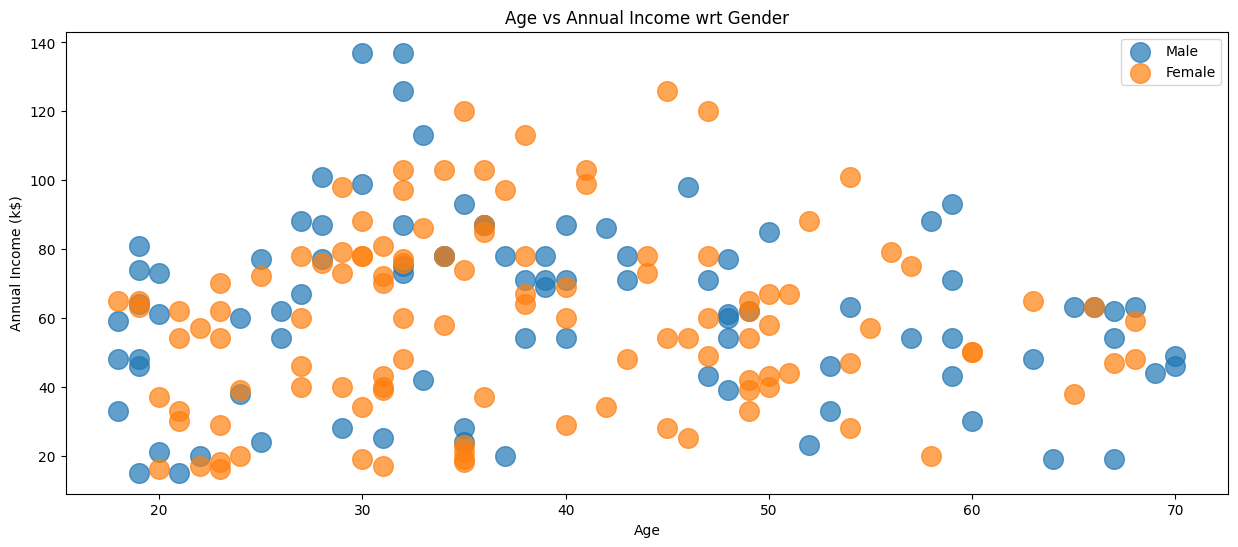

In [17]:
plt.figure(1,figsize = (15,6))
for gender in ['Male','Female']:
    plt.scatter(x = 'Age',y = 'Annual Income (k$)',data =df[df['Gender'] == gender],s = 200,alpha = 0.7,label = gender)
plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income wrt Gender')
plt.legend()
plt.show()

***Pairplot for Age, Annual Income  and Spending Score according to gender***

In [16]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
logging.info(f"X Shape: {X.shape}")
print(X.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
#Explore Different Number of Clusters
n_clusters = range(2, 13)
inertia_errors = []
silhouette_scores = []

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++', algorithm='elkan')
    model.fit(X_scaled)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))


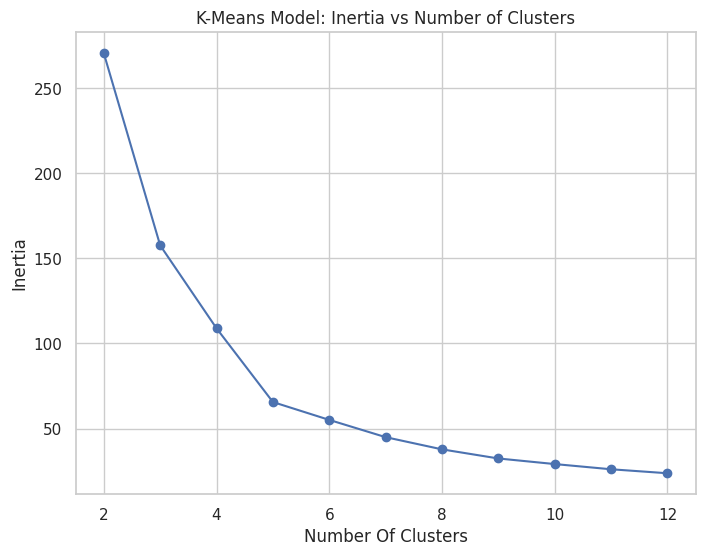

In [20]:
#Plotting Inertia vs Number of Clusters
x_values = list(range(2, 13))
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.plot(x_values, inertia_errors, marker='o', linestyle='-', color='b')
plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [21]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
#Add a for loop to train model and calculate inertia,silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters = k,random_state=42,n_init=10)
    #Train Model
    model.fit(X)
    #Calculate Inertia
    inertia_errors.append(model.inertia_)
    #Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(X,model.labels_))
print("Inertia:",inertia_errors[:3])
print()
print("Silhouette Scores:",silhouette_scores[:3])

Inertia: [181363.59595959593, 106348.37306211122, 73679.78903948836]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


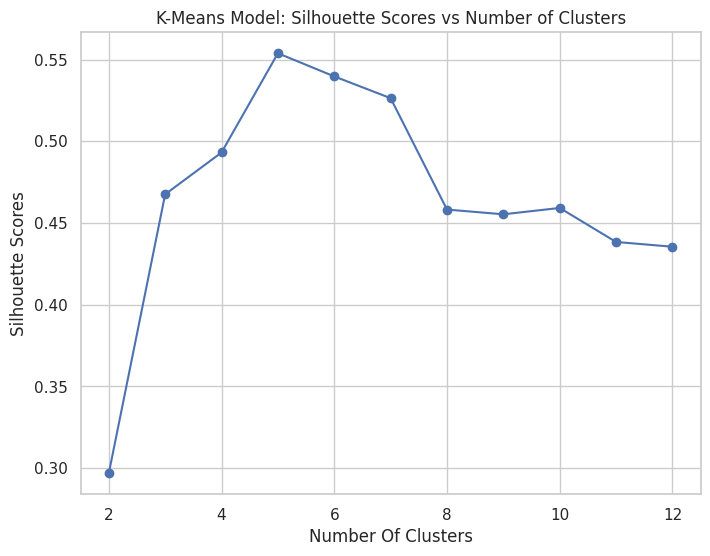

In [22]:
# Cell 13: Plotting Silhouette Scores vs Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(x_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('K-Means Model: Silhouette Scores vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Scores')
plt.grid(True)
plt.show()


In [23]:
final_model = KMeans(n_clusters=5, random_state=42, n_init=10, init='k-means++', algorithm='elkan')
final_model.fit(X_scaled)

KMeans(algorithm='elkan', n_clusters=5, n_init=10, random_state=42)

In [33]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])
print(centroids[:5])

[2 3 2 3 2]
[[-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [-1.32954532  1.13217788]
 [ 0.99158305  1.23950275]]


# Save the model

In [24]:
joblib.dump(final_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

# Get cluster labels and centroids

In [34]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
logging.info("Cluster Labels (First 5):", labels[:5])
logging.info("Centroids (First 5):", centroids[:5])

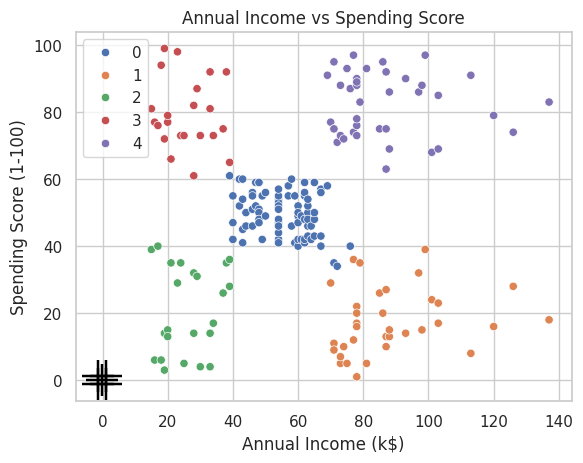

In [26]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=labels, palette='deep')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='+', s=500)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.show()


#Scatter plot for 'Annual Income' vs 'Spending Score' with final_model labels

In [27]:
cluster_means = X.groupby(labels).mean()

In [28]:
cluster_means

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


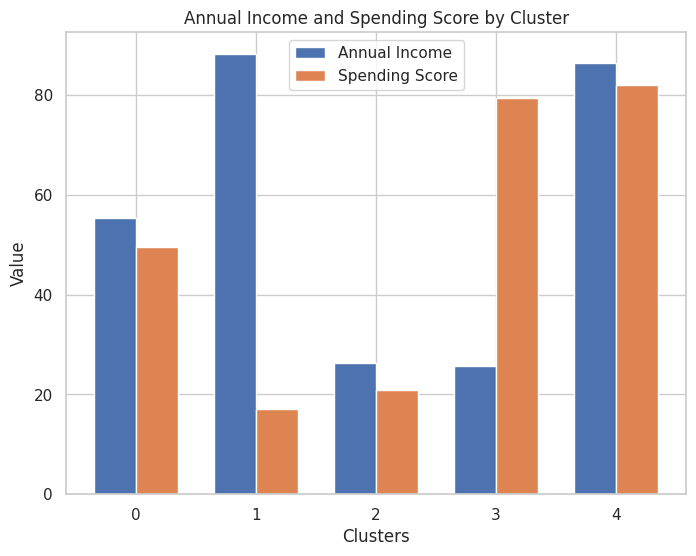

In [29]:
# Create side-by-side bar chart of cluster means
plt.figure(figsize=(8, 6))
x = range(len(cluster_means))
income_values = cluster_means['Annual Income (k$)']
spending_values = cluster_means['Spending Score (1-100)']

bar_width = 0.35
index = range(len(x))

plt.bar(index, income_values, bar_width, label='Annual Income')
plt.bar([i + bar_width for i in index], spending_values, bar_width, label='Spending Score')

plt.xlabel('Clusters')
plt.ylabel('Value')
plt.title('Annual Income and Spending Score by Cluster')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()
plt.show()


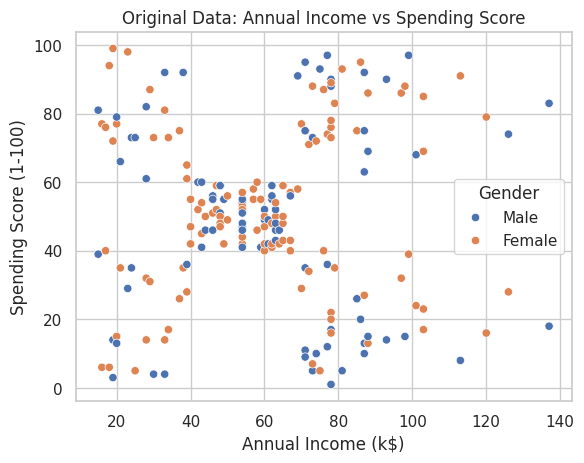

In [30]:
# Scatter plot for 'Annual Income' vs 'Spending Score' with original labels
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'], palette='deep')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Original Data: Annual Income vs Spending Score")
plt.show()


***Scatter plot for 'Annual Income' vs 'Spending Score' with original labels***

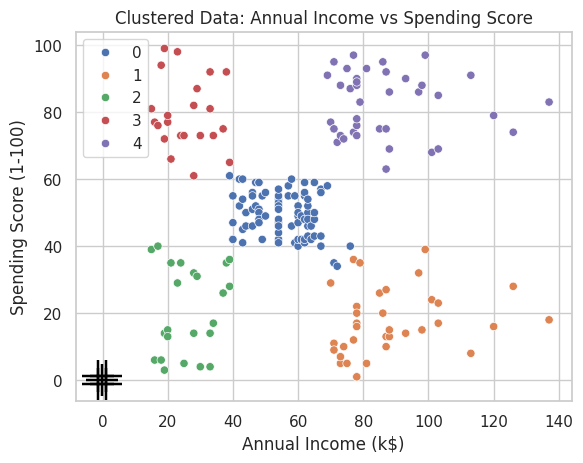

In [31]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=labels, palette='deep')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='+', s=500)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustered Data: Annual Income vs Spending Score")
plt.show()


***Scatter plot for 'Annual Income' vs 'Spending Score' with final_model labels***

In [32]:
#Alternative Cluster Evaluation (Calinski-Harabasz Index)
calinski_score = calinski_harabasz_score(X_scaled, labels)
print("Calinski-Harabasz Index:", calinski_score)


Calinski-Harabasz Index: 248.64932001536357
